# Задание 1: Байесовская классификация

## Открыть в Pandas файл names.csv (см. вложения)

In [35]:
import pandas as pd

In [36]:
names = pd.read_csv("names.csv")

In [37]:
names.head()

year     name   percent  sex
0  1880     John  0.081541  boy
1  1880  William  0.080511  boy
2  1880    James  0.050057  boy
3  1880  Charles  0.045167  boy
4  1880   George  0.043292  boy

## Разделить данные в выборке на обучающий набор и тестирование (выбор принципа разделения за вами – например, 70% данных в обучении и 30% в тестировании)

In [38]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [135]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt


In [136]:
X_data, y_data = names['name'], names['sex']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.2)

## Обучить наивную байесовскую классификацию из файла Sem2.ipynb (см. вложения) на тренировочном наборе данных. Затем с помощью метода classify() разметить имена по полу в тестировочном наборе данных

In [137]:
from collections import defaultdict
from math import log

def train(samples):
    classes, freq = defaultdict(lambda:0), defaultdict(lambda:0)
    for feats, label in samples:
        classes[label] += 1                 # count classes frequencies
        for feat in feats:
            freq[label, feat] += 1          # count features frequencies

    for label, feat in freq:                # normalize features frequencies
        freq[label, feat] /= classes[label]
    for c in classes:                       # normalize classes frequencies
        classes[c] /= len(samples)
    print(classes, freq)
    return classes, freq                    # return P(C) and P(O|C)

def classify(classifier, feats):
    classes, prob = classifier
    return min(classes.keys(),              # calculate argmin(-log(P(C|O))) -> argmax(P(C|O))
        key = lambda cl: -log(classes[cl]) + \
            sum(-log(prob.get((cl,feat), 1e-10)) for feat in feats))
    
def get_features(sample): return (sample[-1]) # get last letter

samples = [(get_features(name), gender) for name, gender in zip(X_train, y_train)]

classifier = train(samples)


defaultdict(<function train.<locals>.<lambda> at 0x164f5ac20>, {'boy': 0.4993701550387597, 'girl': 0.5006298449612403}) defaultdict(<function train.<locals>.<lambda> at 0x168a1aef0>, {('boy', 'e'): 0.13807121373823614, ('boy', 'n'): 0.21519355777626856, ('boy', 'x'): 0.004453284175802852, ('girl', 'r'): 0.011922965256943772, ('boy', 'd'): 0.07302803919666247, ('girl', 'n'): 0.08033484951127455, ('girl', 'e'): 0.3028549308042195, ('boy', 'p'): 0.0031240904239837005, ('girl', 'a'): 0.38390593244943383, ('boy', 'o'): 0.0629475114000194, ('boy', 't'): 0.05281847288250703, ('boy', 'h'): 0.02653536431551373, ('boy', 'r'): 0.06030852818472882, ('girl', 't'): 0.010877770250653247, ('girl', 'i'): 0.027533146230523567, ('boy', 's'): 0.07897545357524013, ('boy', 'a'): 0.0159309207334821, ('boy', 'c'): 0.009323760551081788, ('boy', 'y'): 0.11121567866498497, ('girl', 'y'): 0.07801219394174005, ('girl', 's'): 0.022374915319849028, ('boy', 'k'): 0.022489570195013096, ('boy', 'g'): 0.0060056272436208

In [138]:
classifier

(defaultdict(<function __main__.train.<locals>.<lambda>()>,
             {'boy': 0.4993701550387597, 'girl': 0.5006298449612403}),
 defaultdict(<function __main__.train.<locals>.<lambda>()>,
             {('boy', 'e'): 0.13807121373823614,
              ('boy', 'n'): 0.21519355777626856,
              ('boy', 'x'): 0.004453284175802852,
              ('girl', 'r'): 0.011922965256943772,
              ('boy', 'd'): 0.07302803919666247,
              ('girl', 'n'): 0.08033484951127455,
              ('girl', 'e'): 0.3028549308042195,
              ('boy', 'p'): 0.0031240904239837005,
              ('girl', 'a'): 0.38390593244943383,
              ('boy', 'o'): 0.0629475114000194,
              ('boy', 't'): 0.05281847288250703,
              ('boy', 'h'): 0.02653536431551373,
              ('boy', 'r'): 0.06030852818472882,
              ('girl', 't'): 0.010877770250653247,
              ('girl', 'i'): 0.027533146230523567,
              ('boy', 's'): 0.07897545357524013,
              (

In [139]:
X_train

12552      Clarance
118197    Sebastian
49126           Max
120852        Kadin
234288       Esther
            ...    
224727        Chris
189988       Bethel
145678        Madie
135816         Rosy
223752      Therese
Name: name, Length: 206400, dtype: object

In [140]:
y_train

12552      boy
118197     boy
49126      boy
120852     boy
234288    girl
          ... 
224727    girl
189988    girl
145678    girl
135816    girl
223752    girl
Name: sex, Length: 206400, dtype: object

In [141]:
X_test

61711       Gregg
192189     Bessie
179494     Dessie
173934     Erline
197536      Heidi
           ...   
111036       Jose
246725    Allyssa
162995        Pat
236377    Chantel
12605      Bonnie
Name: name, Length: 51600, dtype: object

In [142]:
y_test

61711      boy
192189    girl
179494    girl
173934    girl
197536    girl
          ... 
111036     boy
246725    girl
162995    girl
236377    girl
12605      boy
Name: sex, Length: 51600, dtype: object

In [143]:
for name in X_test:
    features = get_features(name)
    predicted_gender = classify(classifier, [features])
    print(f"{name} is predicted as {predicted_gender}")

Gregg is predicted as boy
Bessie is predicted as girl
Dessie is predicted as girl
Erline is predicted as girl
Heidi is predicted as girl
Kristina is predicted as girl
Trevor is predicted as boy
Tina is predicted as girl
Josie is predicted as girl
Donnell is predicted as boy
Leah is predicted as boy
Noreen is predicted as boy
Omari is predicted as girl
Alexzander is predicted as boy
Lemuel is predicted as boy
Millie is predicted as girl
Ryan is predicted as boy
Imo is predicted as boy
Josefina is predicted as girl
Cyril is predicted as boy
Roosevelt is predicted as boy
Davon is predicted as boy
Sylvester is predicted as boy
Mona is predicted as girl
Lucy is predicted as boy
Lowell is predicted as boy
Viviana is predicted as girl
Pauletta is predicted as girl
Hugh is predicted as boy
Marilyn is predicted as boy
Deja is predicted as girl
Kelvin is predicted as boy
Livia is predicted as girl
Ace is predicted as girl
Julie is predicted as girl
Timothy is predicted as boy
Sue is predicted as

## Посчитайте среднюю долю правильных "ответов" классификатора. 
## Какие еще метрики можно построить, чтобы оценить, насколько хорошо справился с задачей данный классификатор?

In [144]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predicted = []
for name in X_test:
    features = get_features(name)
    predicted_gender = classify(classifier, [features])
    predicted.append(predicted_gender)

accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy:.2%}')

print('\nClassification Report:')
print(classification_report(y_test, predicted))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

Accuracy: 77.63%

Classification Report:
              precision    recall  f1-score   support

         boy       0.75      0.84      0.79     25930
        girl       0.81      0.71      0.76     25670

    accuracy                           0.78     51600
   macro avg       0.78      0.78      0.78     51600
weighted avg       0.78      0.78      0.78     51600


Confusion Matrix:
[[21735  4195]
 [ 7347 18323]]


## Модифицируйте функцию get_features() таким образом, чтобы в качестве целевого признака бралась другая структура (не последняя буква имени). Возможно, это будет набор из первой и последней буквы. Или, например, имя целиком

### Первая и последняя буква

In [166]:
from collections import defaultdict
from math import log
def train(samples):
    classes, freq = defaultdict(lambda:0), defaultdict(lambda:0)
    for feats, label in samples:
        classes[label] += 1                 # count classes frequencies
        feat = feats[0] + feats[-1]  
        freq[label, feats] += 1          # count features frequencies

    for label, feat in freq:                # normalize features frequencies
        freq[label, feat] /= classes[label]
        
    for c in classes:                       # normalize classes frequencies
        classes[c] /= len(samples)
        
    print(classes, freq)
    return classes, freq                    # return P(C) and P(O|C)

def classify(classifier, feats):
    classes, prob = classifier  
    return min(classes.keys(),              # calculate argmin(-log(P(C|O))) -> argmax(P(C|O))
        key = lambda cl: -log(classes[cl]) + \
            sum(-log(prob.get((cl,feat), 1e-10)) for feat in feats))
    
def get_featuress(sample):
    return "".join(sample[0] + sample[-1])

samples = [(get_featuress(name), gender) for name, gender in zip(X_train, y_train)]

classifier = train(samples)


defaultdict(<function train.<locals>.<lambda> at 0x164f5ab00>, {'boy': 0.4993701550387597, 'girl': 0.5006298449612403}) defaultdict(<function train.<locals>.<lambda> at 0x168a1bbe0>, {('boy', 'Ce'): 0.010895507907247502, ('boy', 'Sn'): 0.014194236926360725, ('boy', 'Mx'): 0.0010478315707771418, ('boy', 'Kn'): 0.007101969535267294, ('girl', 'Er'): 0.00451950062905255, ('boy', 'Dd'): 0.003977879111283594, ('girl', 'Sn'): 0.004664666602148457, ('boy', 'Qn'): 0.0023673231784224315, ('boy', 'We'): 0.004744348501018725, ('girl', 'Re'): 0.012755250169360303, ('girl', 'Je'): 0.03255588889964192, ('boy', 'Pp'): 0.001988939555641797, ('girl', 'Ca'): 0.025036291493273976, ('boy', 'Ao'): 0.012661298146890463, ('boy', 'Wt'): 0.002173280294945183, ('girl', 'Ua'): 0.0013645601471015195, ('boy', 'Jh'): 0.004928689240322111, ('boy', 'Jr'): 0.0031240904239837005, ('girl', 'Mt'): 0.0028936417303783994, ('girl', 'Vn'): 0.001219394174005613, ('boy', 'Tr'): 0.003386048316677986, ('girl', 'Pe'): 0.0077228297

In [167]:
classifier

(defaultdict(<function __main__.train.<locals>.<lambda>()>,
             {'boy': 0.4993701550387597, 'girl': 0.5006298449612403}),
 defaultdict(<function __main__.train.<locals>.<lambda>()>,
             {('boy', 'Ce'): 0.010895507907247502,
              ('boy', 'Sn'): 0.014194236926360725,
              ('boy', 'Mx'): 0.0010478315707771418,
              ('boy', 'Kn'): 0.007101969535267294,
              ('girl', 'Er'): 0.00451950062905255,
              ('boy', 'Dd'): 0.003977879111283594,
              ('girl', 'Sn'): 0.004664666602148457,
              ('boy', 'Qn'): 0.0023673231784224315,
              ('boy', 'We'): 0.004744348501018725,
              ('girl', 'Re'): 0.012755250169360303,
              ('girl', 'Je'): 0.03255588889964192,
              ('boy', 'Pp'): 0.001988939555641797,
              ('girl', 'Ca'): 0.025036291493273976,
              ('boy', 'Ao'): 0.012661298146890463,
              ('boy', 'Wt'): 0.002173280294945183,
              ('girl', 'Ua'): 0.0013645

In [168]:
for name in X_test:
    features = get_featuress(name)
    predicted_gender = classify(classifier, [features])
    print(f"{name} is predicted as {predicted_gender}")

Gregg is predicted as boy
Bessie is predicted as girl
Dessie is predicted as girl
Erline is predicted as girl
Heidi is predicted as girl
Kristina is predicted as girl
Trevor is predicted as boy
Tina is predicted as girl
Josie is predicted as girl
Donnell is predicted as boy
Leah is predicted as girl
Noreen is predicted as boy
Omari is predicted as boy
Alexzander is predicted as boy
Lemuel is predicted as boy
Millie is predicted as girl
Ryan is predicted as boy
Imo is predicted as boy
Josefina is predicted as girl
Cyril is predicted as girl
Roosevelt is predicted as boy
Davon is predicted as boy
Sylvester is predicted as boy
Mona is predicted as girl
Lucy is predicted as boy
Lowell is predicted as boy
Viviana is predicted as girl
Pauletta is predicted as girl
Hugh is predicted as boy
Marilyn is predicted as boy
Deja is predicted as girl
Kelvin is predicted as girl
Livia is predicted as girl
Ace is predicted as girl
Julie is predicted as girl
Timothy is predicted as boy
Sue is predicted 

In [169]:
predicted = []
for name in X_test:
    features = get_featuress(name)
    predicted_gender = classify(classifier, [features])
    predicted.append(predicted_gender)

accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy:.2%}')

print('\nClassification Report:')
print(classification_report(y_test, predicted))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

Accuracy: 79.45%

Classification Report:
              precision    recall  f1-score   support

         boy       0.79      0.80      0.80     25930
        girl       0.80      0.79      0.79     25670

    accuracy                           0.79     51600
   macro avg       0.79      0.79      0.79     51600
weighted avg       0.79      0.79      0.79     51600


Confusion Matrix:
[[20765  5165]
 [ 5440 20230]]


### Действительно первая и последняя буква дают чуть большую точность, однако большее количество учитываемых букв добавит шума в модель и точность понизится 

## Модифицируйте метод classify() так, чтобы вместо логарифмов брались исходные значения вероятностей, а вместо argmin(...) считался функционал argmax(...). Также можете использовать другой метод классификации (из лекций или учебников, или модифицировать его самому методом проб и ошибок).

In [170]:
def classify(classifier, feats):
    classes, prob = classifier
    return max(classes.keys(),              # calculate argmin(-log(P(C|O))) -> argmax(P(C|O))
        key=lambda cl: classes[cl] + \
               sum(prob.get((cl, feat), 1e-10) for feat in feats))

In [171]:
for name in X_test:
    features = get_featuress(name)
    predicted_gender = classify(classifier, [features])
    print(f"{name} is predicted as {predicted_gender}")

Gregg is predicted as girl
Bessie is predicted as girl
Dessie is predicted as girl
Erline is predicted as girl
Heidi is predicted as girl
Kristina is predicted as girl
Trevor is predicted as boy
Tina is predicted as girl
Josie is predicted as girl
Donnell is predicted as boy
Leah is predicted as girl
Noreen is predicted as boy
Omari is predicted as girl
Alexzander is predicted as boy
Lemuel is predicted as boy
Millie is predicted as girl
Ryan is predicted as boy
Imo is predicted as girl
Josefina is predicted as girl
Cyril is predicted as girl
Roosevelt is predicted as boy
Davon is predicted as boy
Sylvester is predicted as boy
Mona is predicted as girl
Lucy is predicted as girl
Lowell is predicted as boy
Viviana is predicted as girl
Pauletta is predicted as girl
Hugh is predicted as girl
Marilyn is predicted as boy
Deja is predicted as girl
Kelvin is predicted as girl
Livia is predicted as girl
Ace is predicted as girl
Julie is predicted as girl
Timothy is predicted as boy
Sue is predi

In [172]:
predicted = []
for name in X_test:
    features = get_featuress(name)
    predicted_gender = classify(classifier, [features])
    predicted.append(predicted_gender)

accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy:.2%}')

print('\nClassification Report:')
print(classification_report(y_test, predicted))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

Accuracy: 75.69%

Classification Report:
              precision    recall  f1-score   support

         boy       0.80      0.68      0.74     25930
        girl       0.72      0.83      0.77     25670

    accuracy                           0.76     51600
   macro avg       0.76      0.76      0.76     51600
weighted avg       0.76      0.76      0.76     51600


Confusion Matrix:
[[17729  8201]
 [ 4341 21329]]


## Улучшилась ли доля правильных ответов алгоритма после модификации целевого признака и метода classify()? Какие выводы можно сделать о выборе целевых признаков и о влиянии классифицирующей функции на результат алгоритма?


### Теоретически и практически ожидается, что результаты будут схожи. Так оно и оказалось. 

## Запустите гауссовский и мультиномиальный классификатор методами из sklearn.naive_bayes. Насколько точна классификация в данном

In [180]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(analyzer='char', ngram_range=(1, 2))

X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

gauss_cl = GaussianNB()
gauss_cl.fit(X_train_vec.toarray(), y_train)
gauss_pred = gauss_cl.predict(X_test_vec.toarray())
accuracy = accuracy_score(y_test, gauss_pred)
print(f"Gaussian NB Accuracy: {accuracy:.2f}")

Gaussian NB Accuracy: 0.57


In [181]:
multi_cl = MultinomialNB()
multi_cl.fit(X_train_vec.toarray(), y_train)
multi_pred = multi_cl.predict(X_test_vec.toarray())
accuracy = accuracy_score(y_test, multi_pred)
print(f"Multinomia NB Accuracy: {accuracy:2f}")

Multinomia NB Accuracy: 0.729496


### Лучший результат показал наивный байесовский классификатор с небольшим отрывом от мультиноминального

# Задание 2: Классификация ирисов

In [182]:
from sklearn.datasets import load_iris

In [183]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [184]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [185]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
LDA_pred = LDA.predict(X_test)
accuracy = accuracy_score(y_test, LDA_pred)
print(f"LDA Accuracy: {accuracy:.2f}")
print('\nClassification Report:')
print(classification_report(y_test, LDA_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, LDA_pred))

LDA Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]


In [186]:
def LDA_dimensionality(X, y, k):
    '''
    X - набор данных, y - метка, k - целевой размер
    '''
    label_ = list(set(y))

    X_classify = {}

    for label in label_:
        X1 = np.array([X[i] for i in range(len(X)) if y[i] == label])
        X_classify[label] = X1

    mju = np.mean(X, axis=0)
    mju_classify = {}

    for label in label_:
        mju1 = np.mean(X_classify[label], axis=0)
        mju_classify[label] = mju1

    #St = np.dot((X - mju).T, X - mju)

    Sw = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
    for i in label_:
        Sw += np.dot((X_classify[i] - mju_classify[i]).T,
                     X_classify[i] - mju_classify[i])

    # Sb=St-Sw

    Sb = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
    for i in label_:
        Sb += len(X_classify[i]) * np.dot((mju_classify[i] - mju).reshape(
            (len(mju), 1)), (mju_classify[i] - mju).reshape((1, len(mju))))

    eig_vals, eig_vecs = np.linalg.eig(
        np.linalg.inv(Sw).dot(Sb))  # Вычислить собственное значение и собственную матрицу Sw-1 * Sb

    sorted_indices = np.argsort(eig_vals)
    topk_eig_vecs = eig_vecs[:, sorted_indices[:-k - 1:-1]]  # Извлекаем первые k векторов признаков
    return topk_eig_vecs

In [187]:
topk_eig_vecs = LDA_dimensionality(X_train, y_train, 2)

X_train_custom_lda = np.dot(X_train, topk_eig_vecs)
X_test_custom_lda = np.dot(X_test, topk_eig_vecs)

In [188]:
classifier_custom_lda = GaussianNB()
classifier_custom_lda.fit(X_train_custom_lda, y_train)
LDA_predict_custom = classifier_custom_lda.predict(X_test_custom_lda)

In [189]:
accuracy = accuracy_score(y_test, LDA_predict_custom)
print(f"LDA Accuracy: {accuracy:.2f}")

print('\nClassification Report:')
print(classification_report(y_test, LDA_predict_custom))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, LDA_predict_custom))

LDA Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]


explained variance ratio (first two components): [0.92461872 0.05306648]


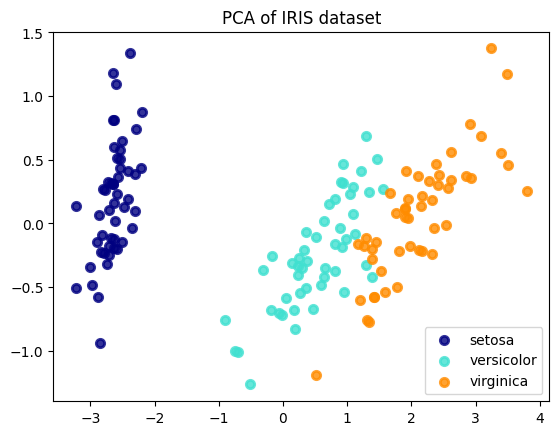

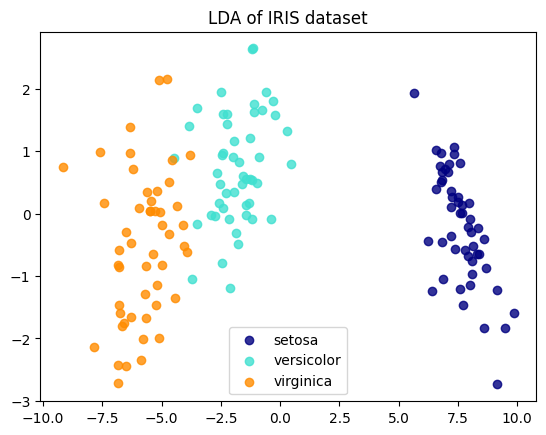

In [190]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
target_names = iris.target_names
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

## Рассмотрите документацию метода LDA и измените параметры классификатора таким образом, чтобы алгоритм работал эффективнее (например, поменять параметр solver). Какие параметры классификатора сильнее сказываются на конечном результате? Чем это может быть объяснимо?


In [191]:
LDA_1 =  LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
LDA_1.fit(X_train, y_train)
LDA_1_pred = LDA_1.predict(X_test)
accuracy = accuracy_score(y_test, LDA_1_pred)
print(f"LDA Accuracy: {accuracy:.2f}")
print('\nClassification Report:')
print(classification_report(y_test, LDA_1_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, LDA_1_pred))

LDA Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]


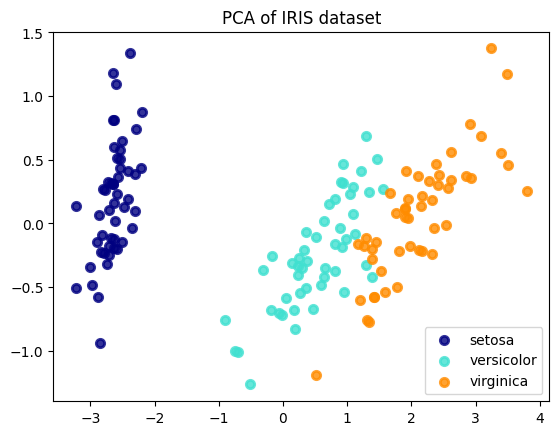

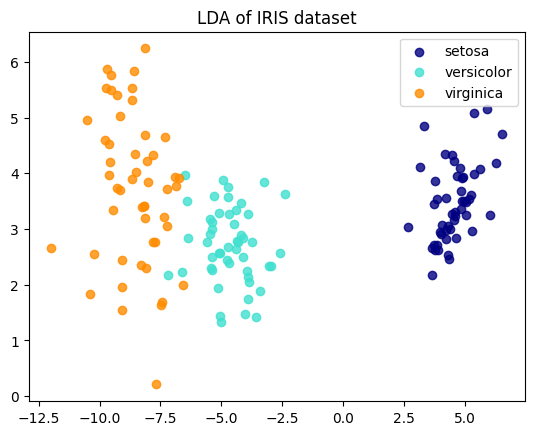

In [192]:
X_r2 = LDA_1.fit(X, y).transform(X)
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

## Элементы пространства признаков группируются в классы с аналогичным методом

# Задание 3: kNN

In [193]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

In [194]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [195]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [196]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [197]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, cross_val_score

## KFold

In [198]:
knn_classifier = KNeighborsClassifier()

average_accuracies = []
for k in range(1, 51):
    knn_classifier.n_neighbors = k
    scores = cross_val_score(knn_classifier, X, y, cv = KFold(n_splits=5, random_state=42, shuffle=True))
    average_accuracy = sum(scores) / len(scores)
    
    print(f"k={k}, Average Accuracy: {average_accuracy:.4f}")
    average_accuracies.append(average_accuracy)
best_k = np.argmax(average_accuracies) + 1
best_accuracy = max(average_accuracies)
print("\n",f"Best k : {best_k}, Best Accuracy: {best_accuracy:.4f}\n")

k=1, Average Accuracy: 0.7305
k=2, Average Accuracy: 0.6625
k=3, Average Accuracy: 0.7083
k=4, Average Accuracy: 0.6578
k=5, Average Accuracy: 0.6746
k=6, Average Accuracy: 0.6743
k=7, Average Accuracy: 0.6800
k=8, Average Accuracy: 0.6800
k=9, Average Accuracy: 0.7024
k=10, Average Accuracy: 0.6802
k=11, Average Accuracy: 0.7025
k=12, Average Accuracy: 0.6967
k=13, Average Accuracy: 0.6910
k=14, Average Accuracy: 0.6794
k=15, Average Accuracy: 0.7019
k=16, Average Accuracy: 0.6795
k=17, Average Accuracy: 0.7016
k=18, Average Accuracy: 0.6795
k=19, Average Accuracy: 0.6794
k=20, Average Accuracy: 0.6910
k=21, Average Accuracy: 0.7019
k=22, Average Accuracy: 0.6965
k=23, Average Accuracy: 0.7021
k=24, Average Accuracy: 0.7076
k=25, Average Accuracy: 0.7019
k=26, Average Accuracy: 0.6965
k=27, Average Accuracy: 0.6963
k=28, Average Accuracy: 0.7079
k=29, Average Accuracy: 0.7135
k=30, Average Accuracy: 0.7079
k=31, Average Accuracy: 0.6910
k=32, Average Accuracy: 0.7135
k=33, Average Acc

c

In [199]:
average_accuracies = []

for k in range(1, 51):
    knn_classifier.n_neighbors = k
    scores = cross_val_score(knn_classifier, X, y, cv = LeaveOneOut())
    average_accuracy = sum(scores) / len(scores)
    
    print(f"k={k}, Average Accuracy: {average_accuracy:.4f}")
    average_accuracies.append(average_accuracy)
best_k = np.argmax(average_accuracies) + 1
best_accuracy = max(average_accuracies)
print("\n",f"Best k : {best_k}, Best Accuracy: {best_accuracy:.4f}\n")

k=1, Average Accuracy: 0.7697
k=2, Average Accuracy: 0.6742
k=3, Average Accuracy: 0.7247
k=4, Average Accuracy: 0.6629
k=5, Average Accuracy: 0.6966
k=6, Average Accuracy: 0.6854
k=7, Average Accuracy: 0.6629
k=8, Average Accuracy: 0.6742
k=9, Average Accuracy: 0.7135
k=10, Average Accuracy: 0.6685
k=11, Average Accuracy: 0.7079
k=12, Average Accuracy: 0.7022
k=13, Average Accuracy: 0.6910
k=14, Average Accuracy: 0.7022
k=15, Average Accuracy: 0.7022
k=16, Average Accuracy: 0.7022
k=17, Average Accuracy: 0.6910
k=18, Average Accuracy: 0.7135
k=19, Average Accuracy: 0.7135
k=20, Average Accuracy: 0.7022
k=21, Average Accuracy: 0.7079
k=22, Average Accuracy: 0.7191
k=23, Average Accuracy: 0.7191
k=24, Average Accuracy: 0.7079
k=25, Average Accuracy: 0.7191
k=26, Average Accuracy: 0.7191
k=27, Average Accuracy: 0.7191
k=28, Average Accuracy: 0.7191
k=29, Average Accuracy: 0.7191
k=30, Average Accuracy: 0.7135
k=31, Average Accuracy: 0.7079
k=32, Average Accuracy: 0.7079
k=33, Average Acc

## Stratified KFold

In [200]:
average_accuracies = []

for k in range(1, 51):
    knn_classifier.n_neighbors = k
    scores = cross_val_score(knn_classifier, X, y, cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True))
    average_accuracy = sum(scores) / len(scores)
    
    print(f"k={k}, Average Accuracy: {average_accuracy:.4f}")
    average_accuracies.append(average_accuracy)
best_k = np.argmax(average_accuracies) + 1
best_accuracy = max(average_accuracies)
print("\n",f"Best k : {best_k}, Best Accuracy: {best_accuracy:.4f}\n")

k=1, Average Accuracy: 0.7186
k=2, Average Accuracy: 0.6400
k=3, Average Accuracy: 0.6792
k=4, Average Accuracy: 0.6797
k=5, Average Accuracy: 0.6802
k=6, Average Accuracy: 0.6970
k=7, Average Accuracy: 0.6798
k=8, Average Accuracy: 0.6802
k=9, Average Accuracy: 0.6856
k=10, Average Accuracy: 0.6684
k=11, Average Accuracy: 0.6738
k=12, Average Accuracy: 0.6852
k=13, Average Accuracy: 0.6968
k=14, Average Accuracy: 0.6852
k=15, Average Accuracy: 0.7025
k=16, Average Accuracy: 0.7137
k=17, Average Accuracy: 0.6856
k=18, Average Accuracy: 0.6856
k=19, Average Accuracy: 0.6741
k=20, Average Accuracy: 0.6686
k=21, Average Accuracy: 0.6800
k=22, Average Accuracy: 0.6743
k=23, Average Accuracy: 0.6687
k=24, Average Accuracy: 0.6684
k=25, Average Accuracy: 0.6517
k=26, Average Accuracy: 0.6684
k=27, Average Accuracy: 0.6629
k=28, Average Accuracy: 0.6684
k=29, Average Accuracy: 0.6629
k=30, Average Accuracy: 0.6684
k=31, Average Accuracy: 0.6573
k=32, Average Accuracy: 0.6629
k=33, Average Acc

### LOO - самая "затратная" кросс-валидация, которая требует обучения модели для каждого наблюдения. 
### Именно поэтому её оценка наилучая среди трёх, тк все наблюдения используются в тесте по одному разу, а лучшая точность с одним соседом во всех трёх моделях тк отсутствует маштабированность, вследствие чего шум также отсутсвует

## Произведите масштабирование признаков спомощью функции sklearn.preprocessing.scale. Снова найдите оптимальное k на трех разных кросс-валидациях. Чему оно равно? Изменилось ли оно? Изменился ли оптимальный метод валидации?

In [201]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

## KFold

In [202]:
average_accuracies = []
for k in range(1, 51):
    knn_classifier.n_neighbors = k
    scores = cross_val_score(knn_classifier, X_scaled, y, cv = KFold(n_splits=5, random_state=42, shuffle=True))
    average_accuracy = sum(scores) / len(scores)
    
    print(f"k={k}, Average Accuracy: {average_accuracy:.4f}")
    average_accuracies.append(average_accuracy)
best_k = np.argmax(average_accuracies) + 1
best_accuracy = max(average_accuracies)
print("\n",f"Best k : {best_k}, Best Accuracy: {best_accuracy:.4f}\n")

k=1, Average Accuracy: 0.9440
k=2, Average Accuracy: 0.9329
k=3, Average Accuracy: 0.9551
k=4, Average Accuracy: 0.9383
k=5, Average Accuracy: 0.9494
k=6, Average Accuracy: 0.9495
k=7, Average Accuracy: 0.9495
k=8, Average Accuracy: 0.9552
k=9, Average Accuracy: 0.9608
k=10, Average Accuracy: 0.9608
k=11, Average Accuracy: 0.9610
k=12, Average Accuracy: 0.9552
k=13, Average Accuracy: 0.9495
k=14, Average Accuracy: 0.9663
k=15, Average Accuracy: 0.9721
k=16, Average Accuracy: 0.9721
k=17, Average Accuracy: 0.9665
k=18, Average Accuracy: 0.9665
k=19, Average Accuracy: 0.9554
k=20, Average Accuracy: 0.9665
k=21, Average Accuracy: 0.9610
k=22, Average Accuracy: 0.9665
k=23, Average Accuracy: 0.9610
k=24, Average Accuracy: 0.9552
k=25, Average Accuracy: 0.9552
k=26, Average Accuracy: 0.9608
k=27, Average Accuracy: 0.9552
k=28, Average Accuracy: 0.9663
k=29, Average Accuracy: 0.9776
k=30, Average Accuracy: 0.9608
k=31, Average Accuracy: 0.9552
k=32, Average Accuracy: 0.9608
k=33, Average Acc

## LOO

In [203]:
average_accuracies = []
for k in range(1, 51):
    knn_classifier.n_neighbors = k
    scores = cross_val_score(knn_classifier, X_scaled, y, cv = LeaveOneOut())
    average_accuracy = sum(scores) / len(scores)
    
    print(f"k={k}, Average Accuracy: {average_accuracy:.4f}")
    average_accuracies.append(average_accuracy)
best_k = np.argmax(average_accuracies) + 1
best_accuracy = max(average_accuracies)
print("\n",f"Best k : {best_k}, Best Accuracy: {best_accuracy:.4f}\n")

k=1, Average Accuracy: 0.9551
k=2, Average Accuracy: 0.9438
k=3, Average Accuracy: 0.9551
k=4, Average Accuracy: 0.9494
k=5, Average Accuracy: 0.9719
k=6, Average Accuracy: 0.9607
k=7, Average Accuracy: 0.9663
k=8, Average Accuracy: 0.9607
k=9, Average Accuracy: 0.9719
k=10, Average Accuracy: 0.9719
k=11, Average Accuracy: 0.9775
k=12, Average Accuracy: 0.9663
k=13, Average Accuracy: 0.9607
k=14, Average Accuracy: 0.9607
k=15, Average Accuracy: 0.9663
k=16, Average Accuracy: 0.9719
k=17, Average Accuracy: 0.9607
k=18, Average Accuracy: 0.9719
k=19, Average Accuracy: 0.9719
k=20, Average Accuracy: 0.9719
k=21, Average Accuracy: 0.9719
k=22, Average Accuracy: 0.9719
k=23, Average Accuracy: 0.9719
k=24, Average Accuracy: 0.9719
k=25, Average Accuracy: 0.9775
k=26, Average Accuracy: 0.9775
k=27, Average Accuracy: 0.9719
k=28, Average Accuracy: 0.9775
k=29, Average Accuracy: 0.9775
k=30, Average Accuracy: 0.9719
k=31, Average Accuracy: 0.9719
k=32, Average Accuracy: 0.9719
k=33, Average Acc

## Stratified KFold

In [204]:
average_accuracies = []
for k in range(1, 51):
    knn_classifier.n_neighbors = k
    scores = cross_val_score(knn_classifier, X_scaled, y, cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True))
    average_accuracy = sum(scores) / len(scores)
    
    print(f"k={k}, Average Accuracy: {average_accuracy:.4f}")
    average_accuracies.append(average_accuracy)
best_k = np.argmax(average_accuracies) + 1
best_accuracy = max(average_accuracies)
print("\n",f"Best k : {best_k}, Best Accuracy: {best_accuracy:.4f}\n")

k=1, Average Accuracy: 0.9551
k=2, Average Accuracy: 0.9495
k=3, Average Accuracy: 0.9662
k=4, Average Accuracy: 0.9552
k=5, Average Accuracy: 0.9717
k=6, Average Accuracy: 0.9549
k=7, Average Accuracy: 0.9719
k=8, Average Accuracy: 0.9719
k=9, Average Accuracy: 0.9719
k=10, Average Accuracy: 0.9719
k=11, Average Accuracy: 0.9662
k=12, Average Accuracy: 0.9663
k=13, Average Accuracy: 0.9776
k=14, Average Accuracy: 0.9721
k=15, Average Accuracy: 0.9665
k=16, Average Accuracy: 0.9776
k=17, Average Accuracy: 0.9721
k=18, Average Accuracy: 0.9721
k=19, Average Accuracy: 0.9721
k=20, Average Accuracy: 0.9665
k=21, Average Accuracy: 0.9665
k=22, Average Accuracy: 0.9721
k=23, Average Accuracy: 0.9662
k=24, Average Accuracy: 0.9719
k=25, Average Accuracy: 0.9662
k=26, Average Accuracy: 0.9662
k=27, Average Accuracy: 0.9717
k=28, Average Accuracy: 0.9717
k=29, Average Accuracy: 0.9717
k=30, Average Accuracy: 0.9775
k=31, Average Accuracy: 0.9775
k=32, Average Accuracy: 0.9717
k=33, Average Acc

### Отмечается значительное увеличение точности до 0.98, что наблюдается во всех методах кросс-валидации. Теперь оптимальное количество соседей находится ближе к середине отрезка [1, 50]
### При использовании KNN и схожих алгоритмов стоит использовать масштабирование для увеличения точности предиктов